# DM-26051: HiTS2015 processed with ap_pipe using a PostgreSQL APDB

Results are identical to the "July 2020 rerun" I did last month, and no appreciable change since June either.

I made some updates to my plotting scripts so I can correctly load the PostgreSQL APDB with `psycopg2` which will be pushed as part of DM-26051.

Now that this proof of concept was successful, I'm going to use PostgreSQL with ap_pipe on HSC data.

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
import psycopg2

from astropy.coordinates import SkyCoord
import astropy.units as u

import lsst.daf.persistence as dafPersist

In [2]:
sys.path.append('/project/mrawls/ap_pipe-notebooks/')
import diaObjectAnalysis as doa
import apdbPlots as pla

In [43]:
# Only if you change anything in the code imported above
importlib.reload(doa)
importlib.reload(pla)

<module 'apdbPlots' from '/project/mrawls/ap_pipe-notebooks/apdbPlots.py'>

In [11]:
# Example for how to connect to a PostgreSQL database

# dbName = 'lsstdevapdb1'
# host = 'lsst-pg-devel1.ncsa.illinois.edu'
# connection = psycopg2.connect(dbname=dbName, host=host)

In [6]:
tables = {'obj': '"DiaObject"', 'src': '"DiaSource"', 'sso': '"SSObject"', 'forcedsrc': '"DiaForcedSource"'}
objTable = pd.read_sql_query('select "diaObjectId", "ra", "decl", "nDiaSources", \
                                  "gPSFluxMean", "validityEnd", "flags" from {0} \
                                  where "validityEnd" is NULL;'.format(tables['obj']), connection)

In [7]:
srcTable = pd.read_sql_query('select "diaSourceId", "diaObjectId", \
                                  "ra", "decl", "ccdVisitId", \
                                  "midPointTai", "apFlux", "psFlux", "apFluxErr", \
                                  "psFluxErr", "totFlux", "totFluxErr", "x", "y", \
                                  "ixxPSF", "ixyPSF", "flags" from {0}; \
                                  '.format(tables['src']), connection)

In [ ]:
# for reasons I don't understand, "iyyPSF" doesn't exist?! right.

In [8]:
repo = '/project/mrawls/hits2015/rerun/cw_2020_07pg'

In [9]:
objTable, srcTable, goodObj, goodSrc = pla.loadTables(repo, dbType='postgres', dbName='lsstdevapdb1')

<IPython.core.display.Javascript object>


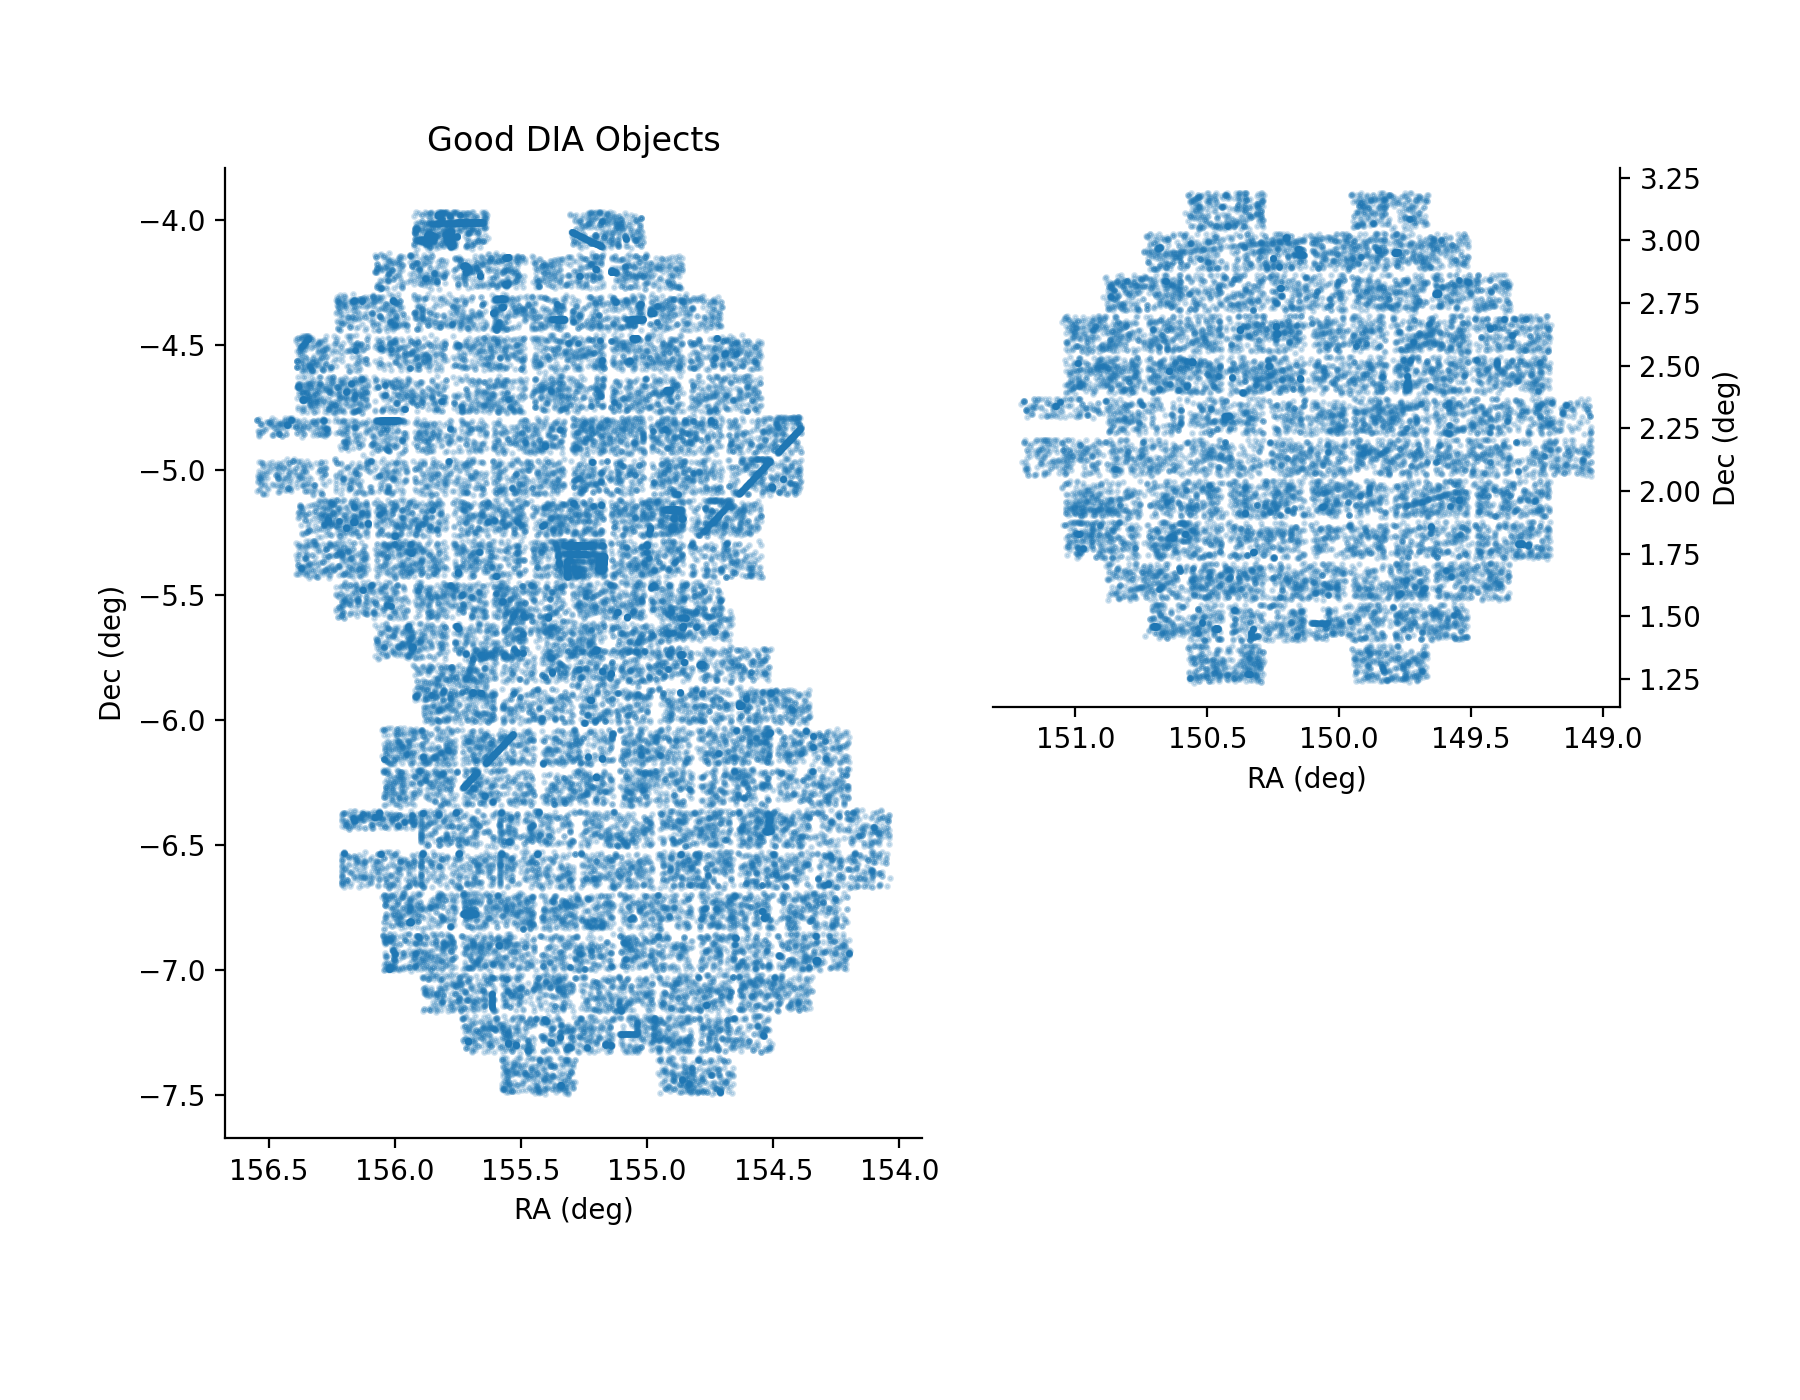

In [10]:
hitsPlot = pla.plotHitsSourcesOnSky(goodObj, title='Good DIA Objects')

<IPython.core.display.Javascript object>


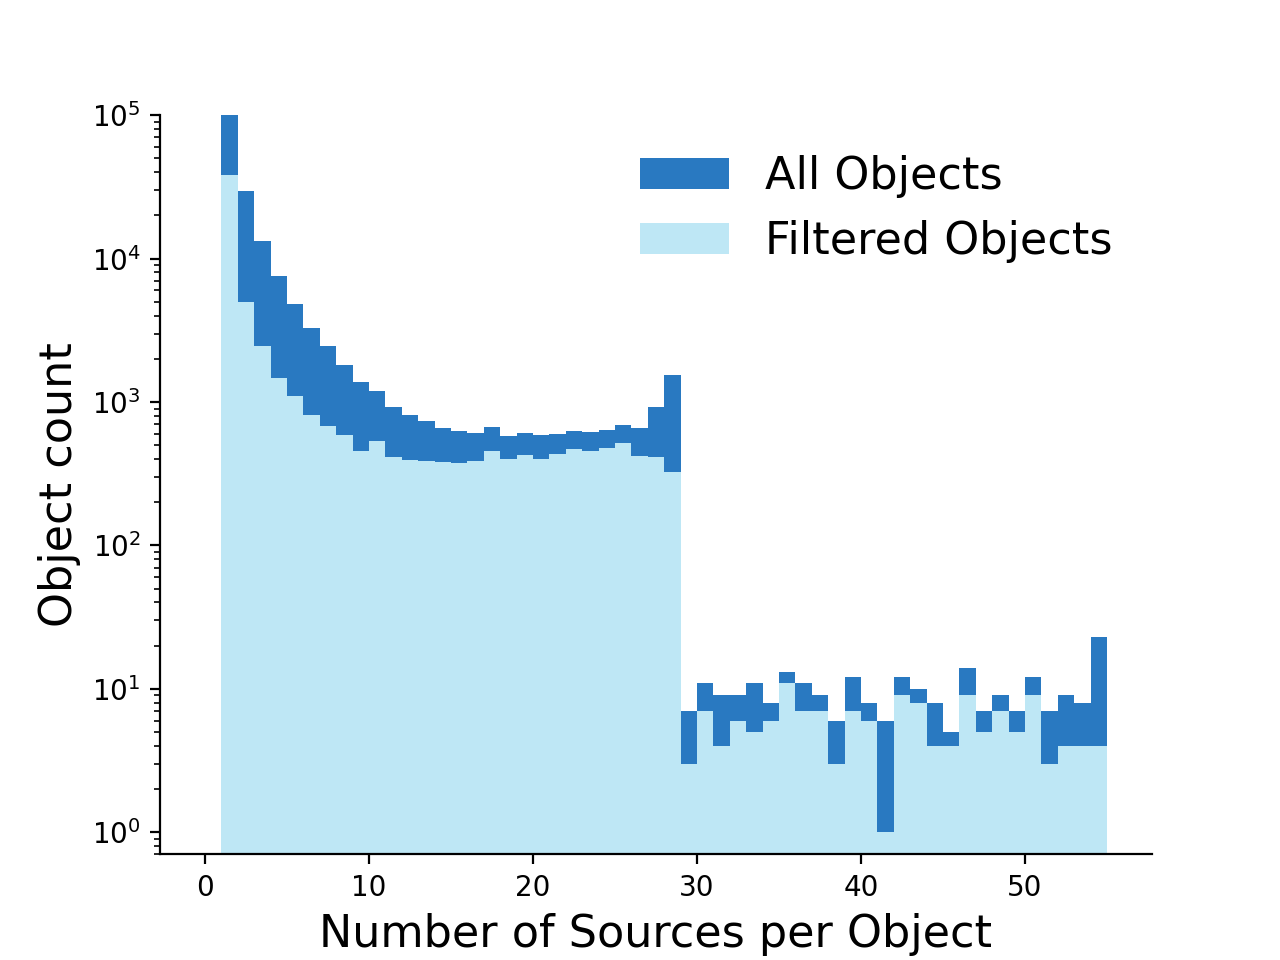

In [12]:
hist = doa.plotDiaObjectHistogram(objTable, goodObj)

<IPython.core.display.Javascript object>


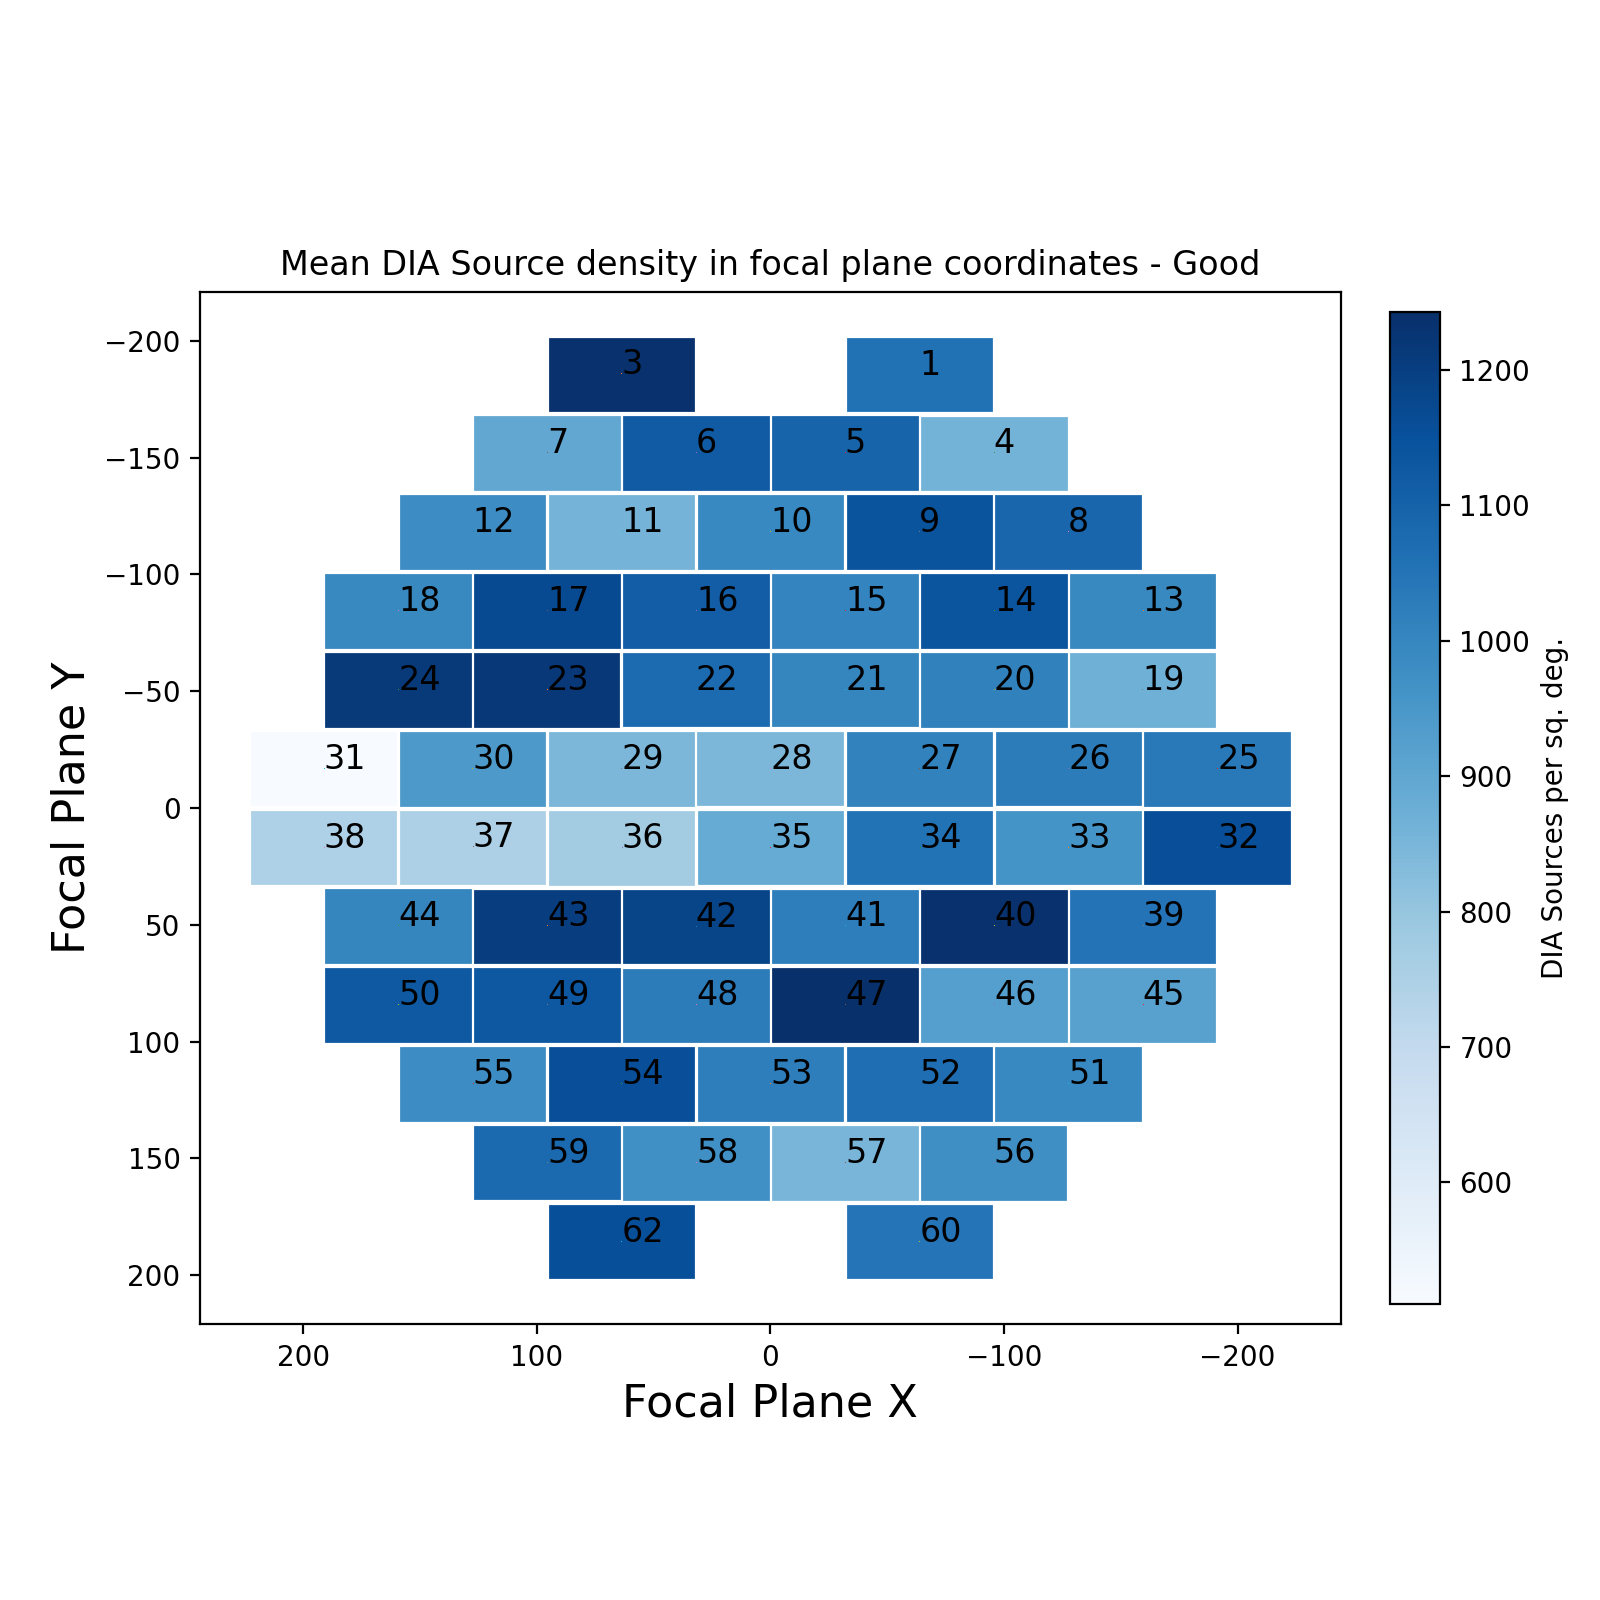

In [13]:
pla.plotDiaSourceDensityInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


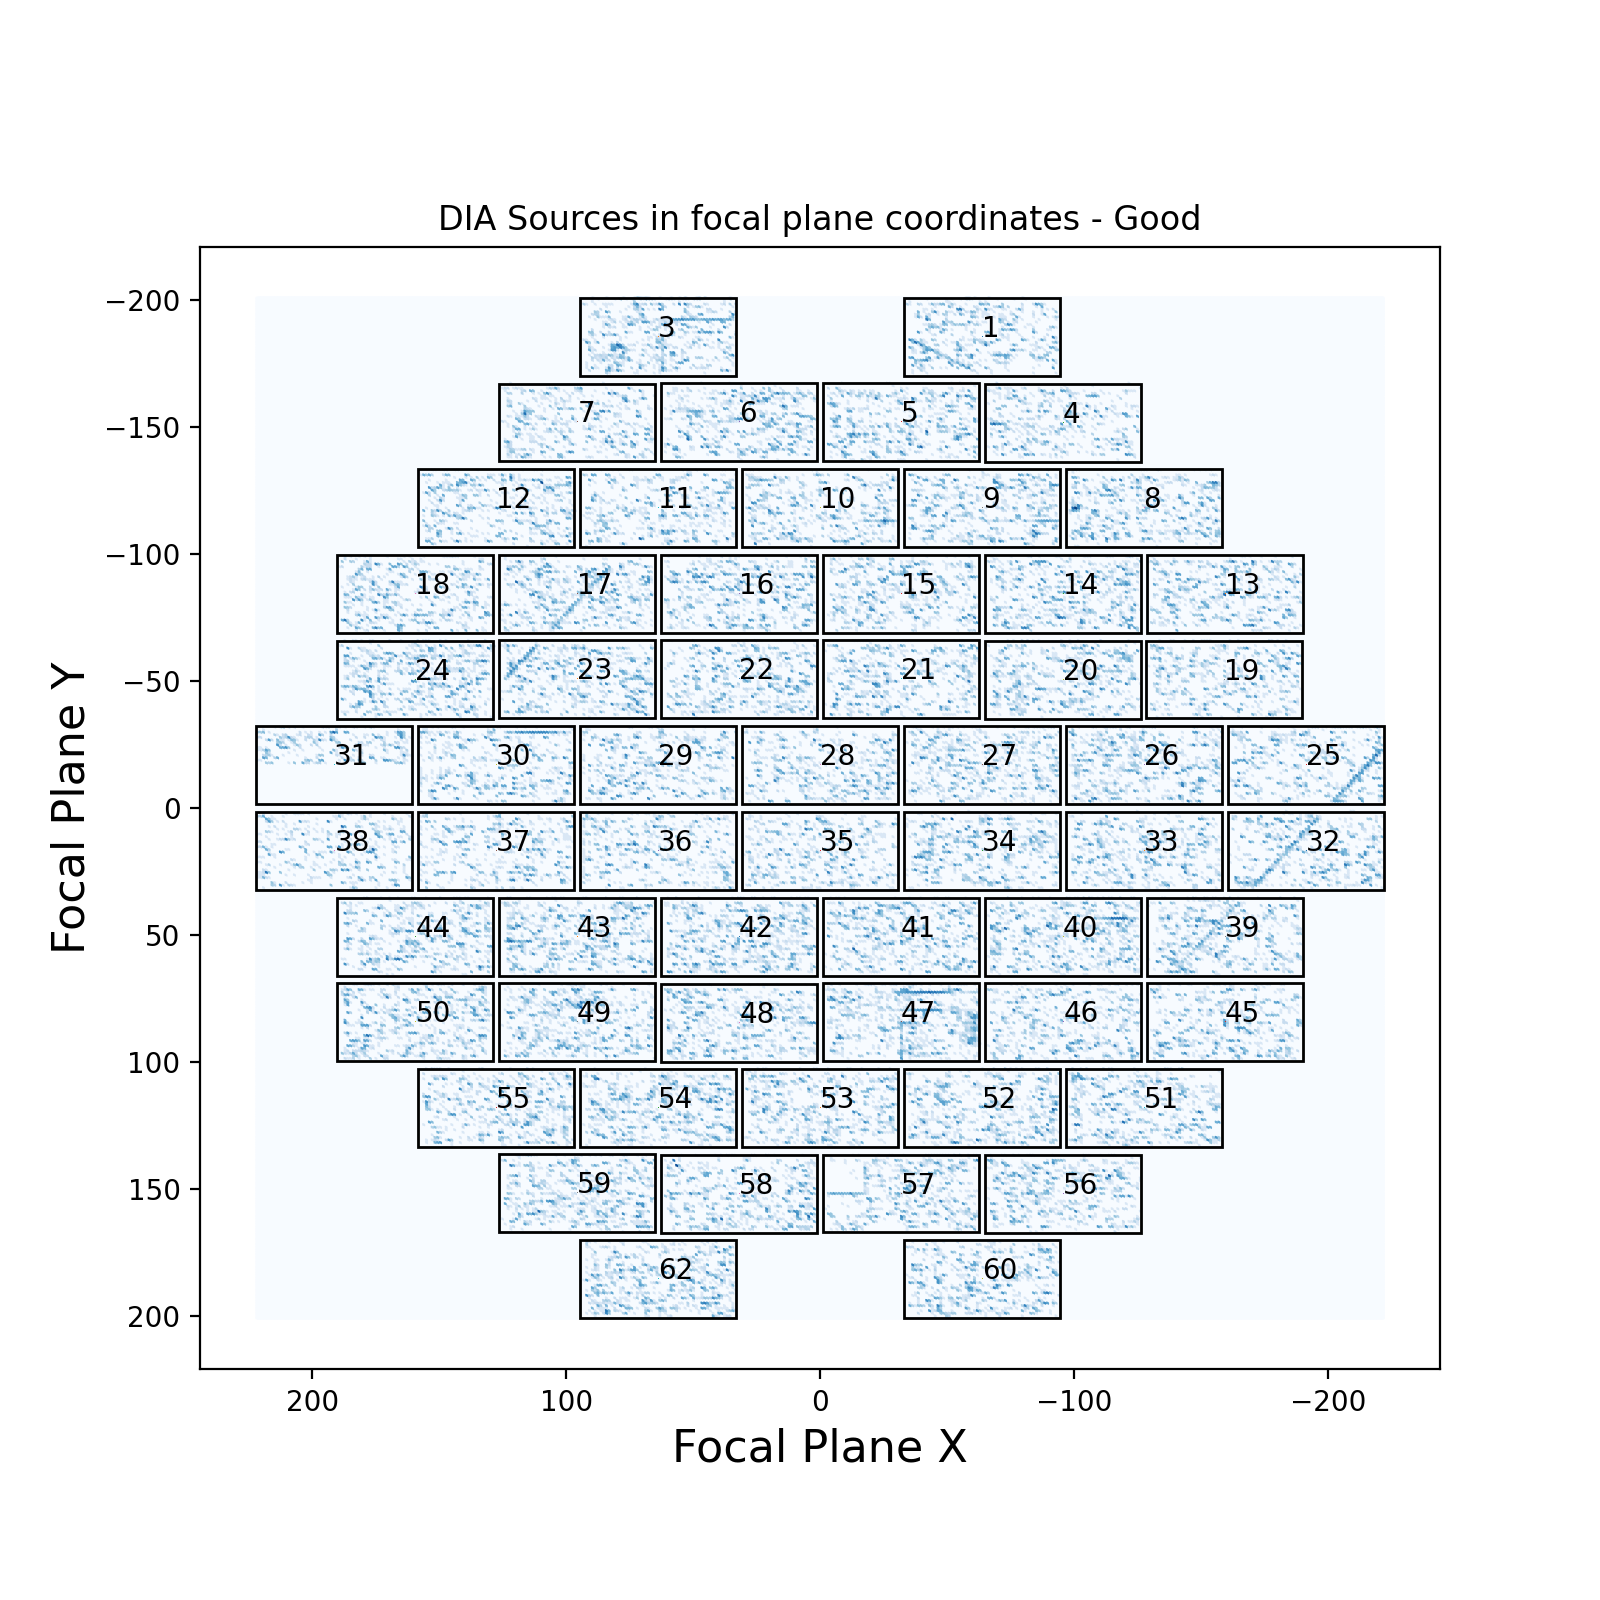

In [14]:
pla.plotDiaSourcesInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


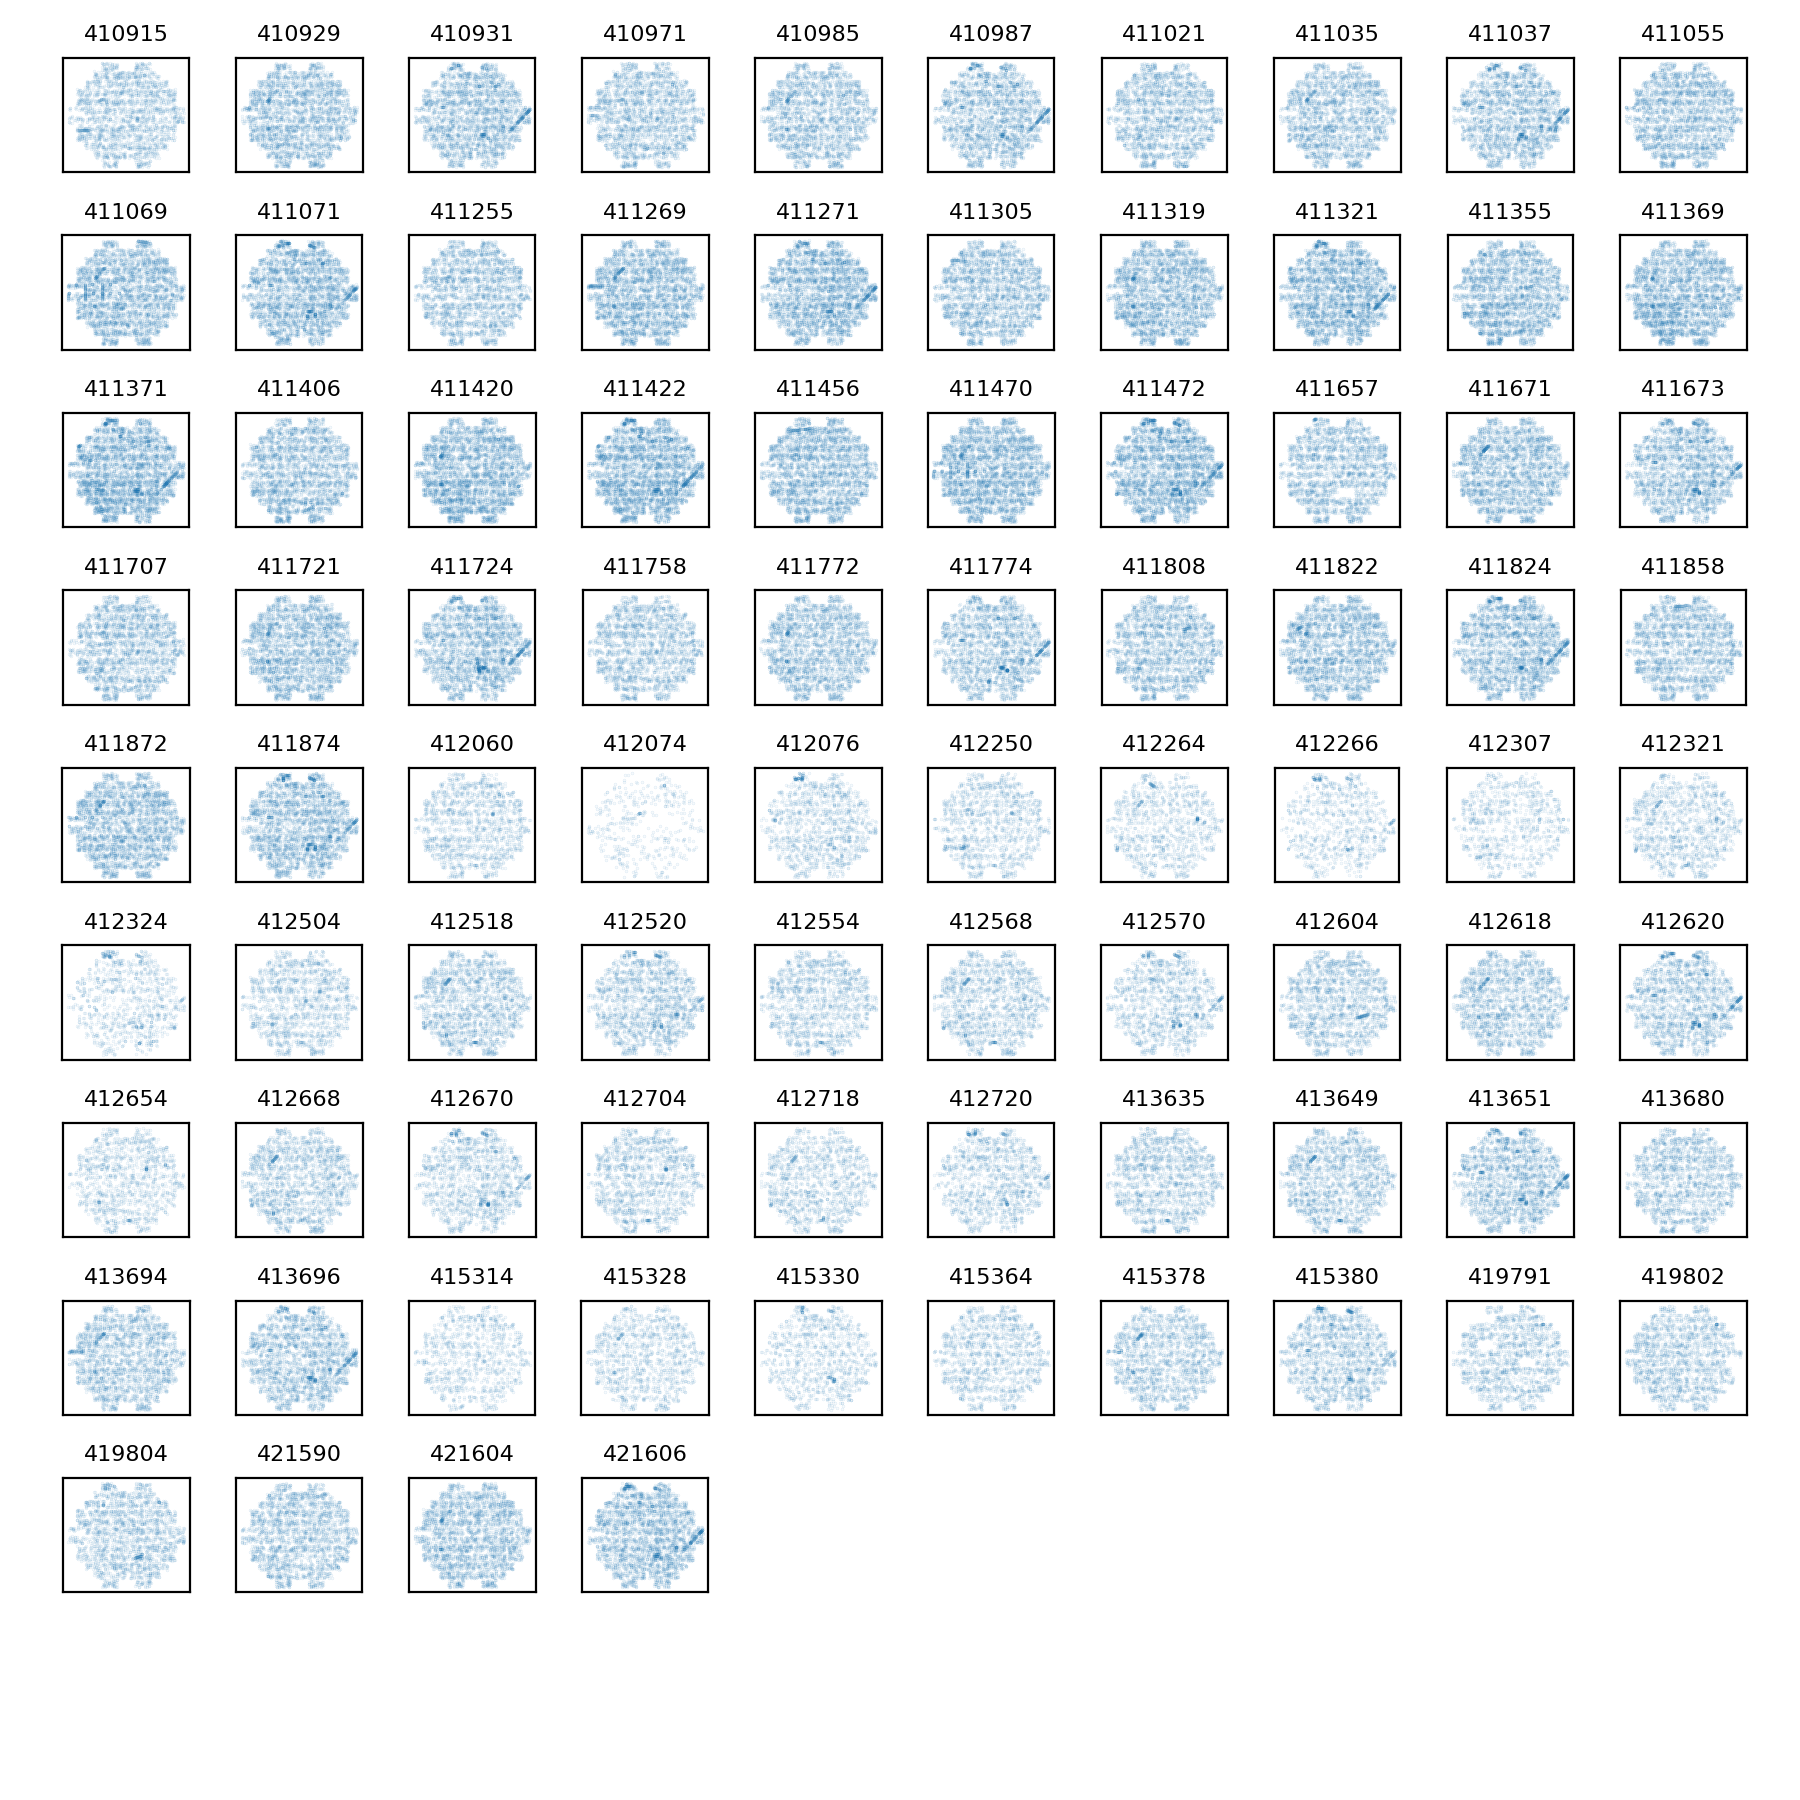

In [15]:
pla.plotDiaSourcesOnSkyGrid(repo, goodSrc)

In [17]:
repo_old = '/project/mrawls/hits2015/rerun/cw_2020_07'
repo_older = '/project/mrawls/hits2015/rerun/cw_2020_06'

In [18]:
objTable_old, srcTable_old, goodObj_old, goodSrc_old = pla.loadTables(repo_old)

In [19]:
objTable_older, srcTable_older, goodObj_older, goodSrc_older = pla.loadTables(repo_older)

In [22]:
print(len(srcTable), len(srcTable_old), len(srcTable_older))
print(len(goodSrc), len(goodSrc_old), len(goodSrc_older))
print(len(objTable), len(objTable_old), len(objTable_older))
print(len(goodObj), len(goodObj_old), len(goodObj_older))

670698 671170 671170
229153 229290 229290
247371 247550 247550
59325 59352 59351


<IPython.core.display.Javascript object>


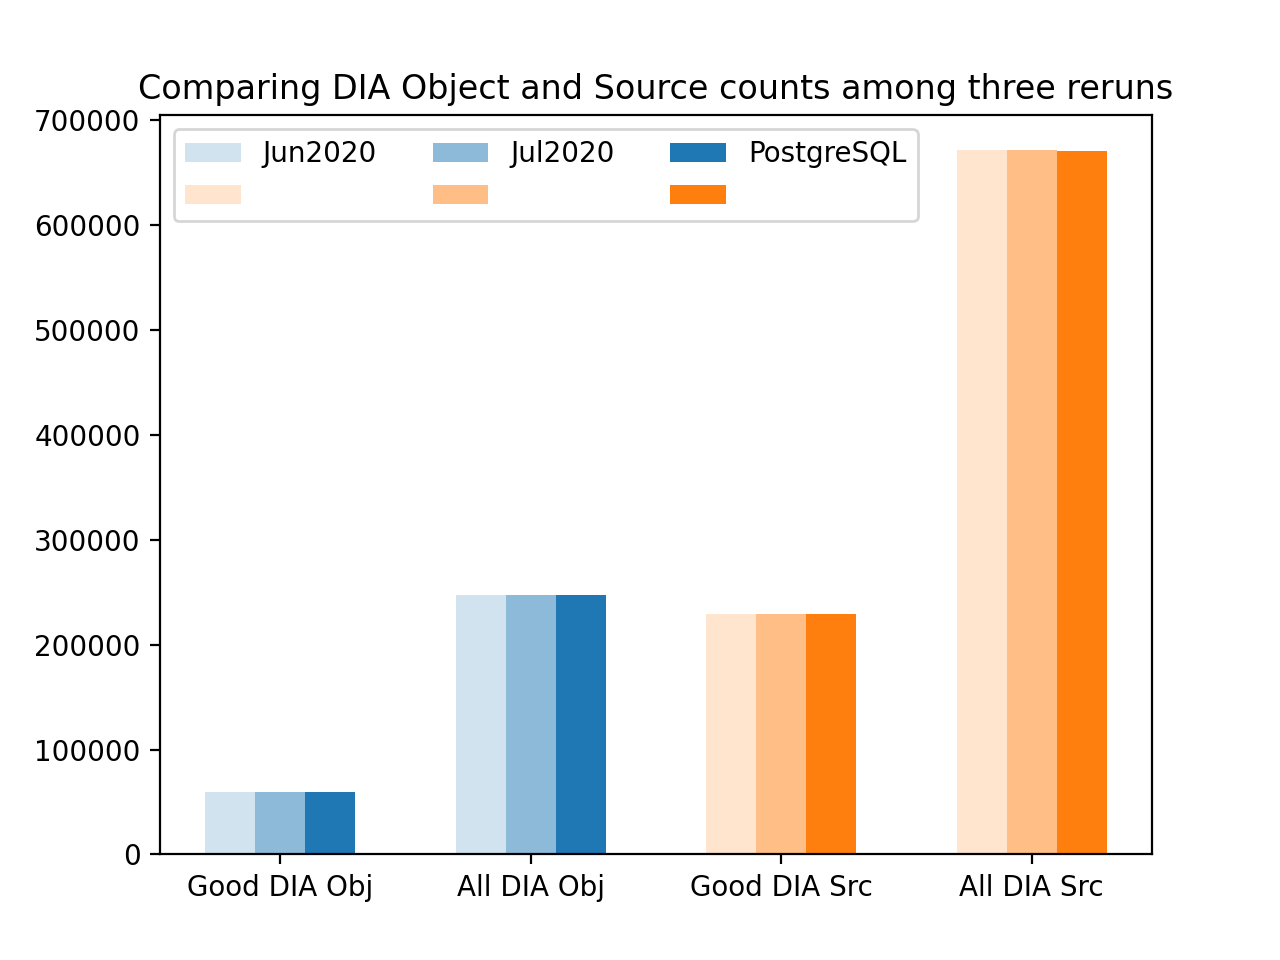

Text(0.5, 1.0, 'Comparing DIA Object and Source counts among three reruns')

In [21]:
srcTable3 = srcTable_older
goodSrc3 = goodSrc_older
objTable3 = objTable_older
goodObj3 = goodObj_older
label3 = "Jun2020"

srcTable1 = srcTable_old
goodSrc1 = goodSrc_old
objTable1 = objTable_old
goodObj1 = goodObj_old
label1 = "Jul2020"

srcTable2 = srcTable
goodSrc2 = goodSrc
objTable2 = objTable
goodObj2 = goodObj
label2 = "PostgreSQL"

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.2

# June
ax.bar(xbar - width, [len(goodObj3), len(objTable3)], 
       width, label=label3, color='C0', alpha=0.2)
ax.bar(xbar + 2 - width, [len(goodSrc3), len(srcTable3)],
       width, label=' ', color='C1', alpha=0.2)

# July Original
ax.bar(xbar, [len(goodObj1), len(objTable1)], 
       width, label=label1, color='C0', alpha=0.5)
ax.bar(xbar + 2, [len(goodSrc1), len(srcTable1)],
       width, label=' ', color='C1', alpha=0.5)

# July PostgreSQL
ax.bar(xbar + width, [len(goodObj2), len(objTable2)], 
       width, label=label2, color='C0')
ax.bar(xbar + 2 + width, [len(goodSrc2), len(srcTable2)],
       width, label=' ', color='C1')

plt.legend(ncol=3)
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title('Comparing DIA Object and Source counts among three reruns')